In [2]:
#load the data

data <- read.csv("forestfires.csv", header = TRUE, sep = ",")
head(data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [3]:
# Display the structure of the dataset
str(data)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [4]:
# Load necessary libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




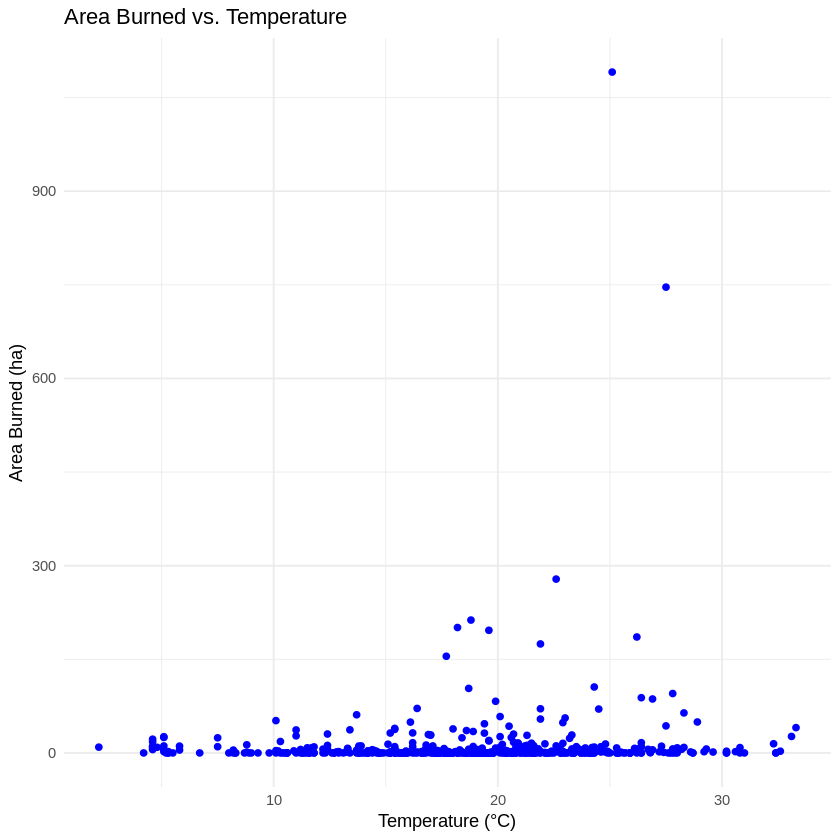

In [8]:
# Scatter plot of area burned vs. temperature
ggplot(data, aes(x = temp, y = area)) +
  geom_point(color = "blue") +
  labs(title = "Area Burned vs. Temperature", x = "Temperature (°C)", y = "Area Burned (ha)") +
  theme_minimal()


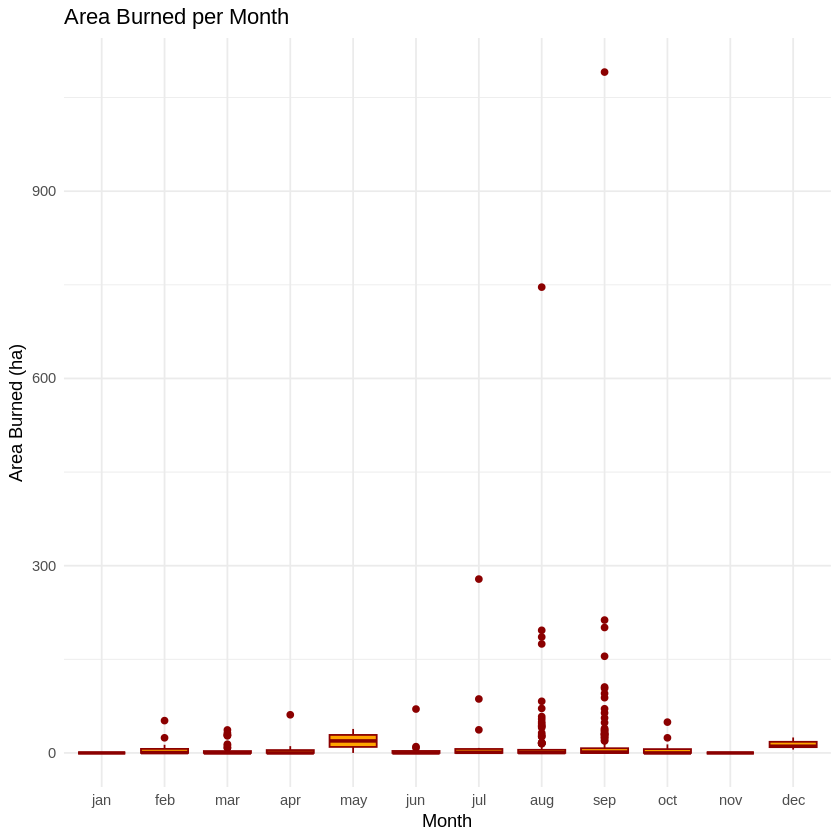

In [9]:
# Convert month to a factor for better visualization
data$month <- factor(data$month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))

# Box plot of area burned per month
ggplot(data, aes(x = month, y = area)) +
  geom_boxplot(fill = "orange", color = "darkred") +
  labs(title = "Area Burned per Month", x = "Month", y = "Area Burned (ha)") +
  theme_minimal()


Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




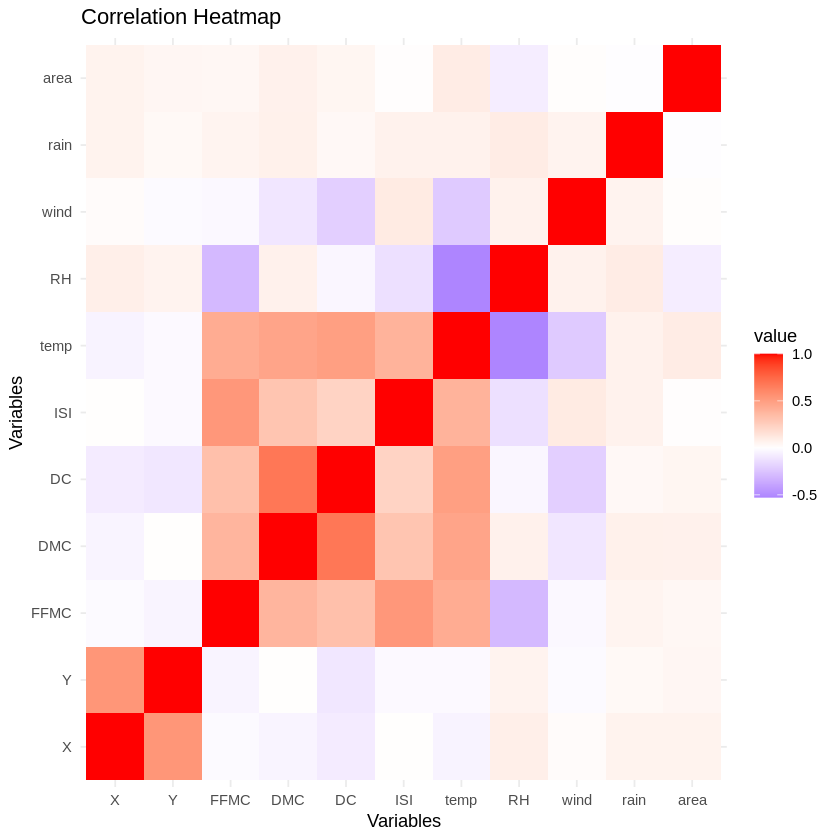

In [11]:
# Install the reshape2 package if not already installed
if (!require(reshape2)) {
  install.packages("reshape2")
}

# Load the library
library(reshape2)

# Proceed with the correlation heatmap code
# Calculate the correlation matrix for numeric columns
numeric_data <- data %>% select_if(is.numeric)
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Heatmap of the correlation matrix
melted_correlation <- melt(correlation_matrix)

ggplot(melted_correlation, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme_minimal()


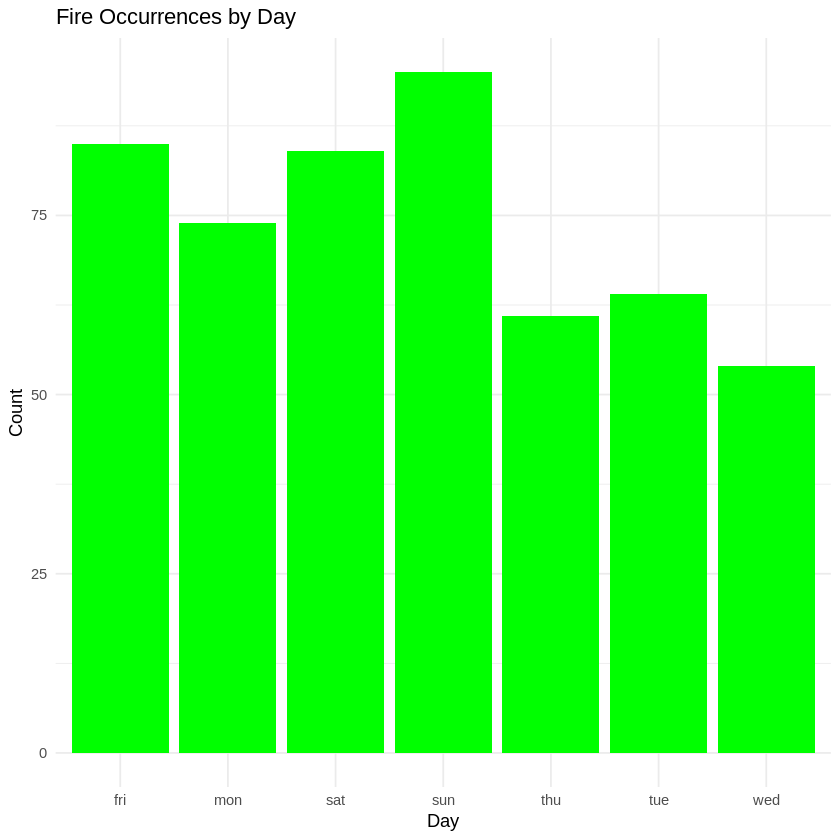

In [12]:
# Bar plot of fire occurrences by day of the week
ggplot(data, aes(x = factor(day))) +
  geom_bar(fill = "green") +
  labs(title = "Fire Occurrences by Day", x = "Day", y = "Count") +
  theme_minimal()


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 247 rows containing non-finite outside the scale range (`stat_bin()`).”


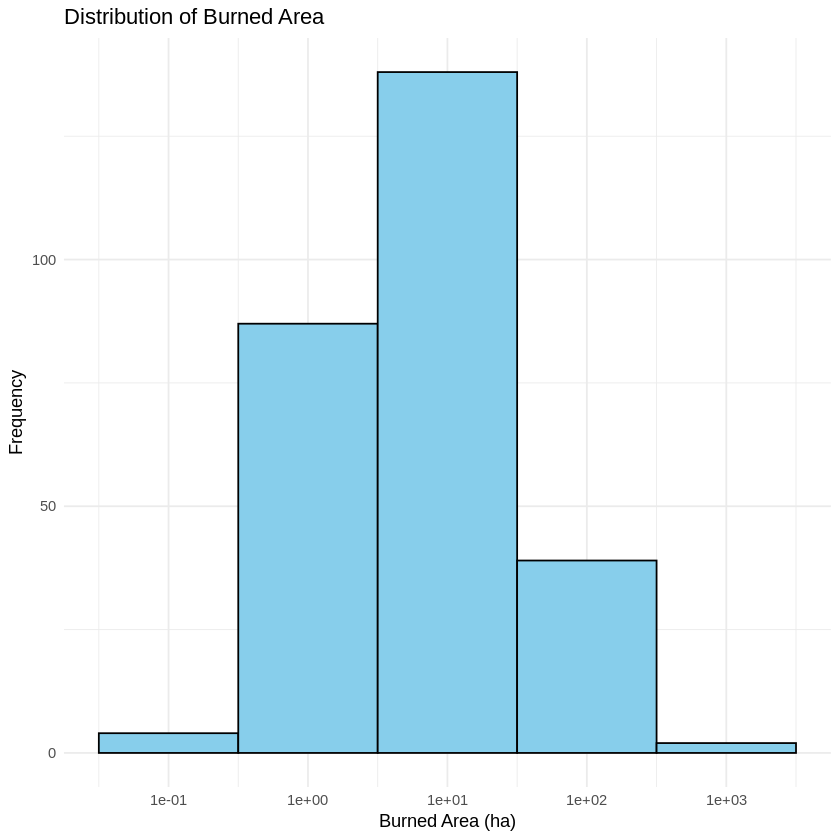

In [13]:
# Histogram of the burned area
ggplot(data, aes(x = area)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Burned Area", x = "Burned Area (ha)", y = "Frequency") +
  theme_minimal() +
  scale_x_log10()  # Use log scale to better visualize skewed data


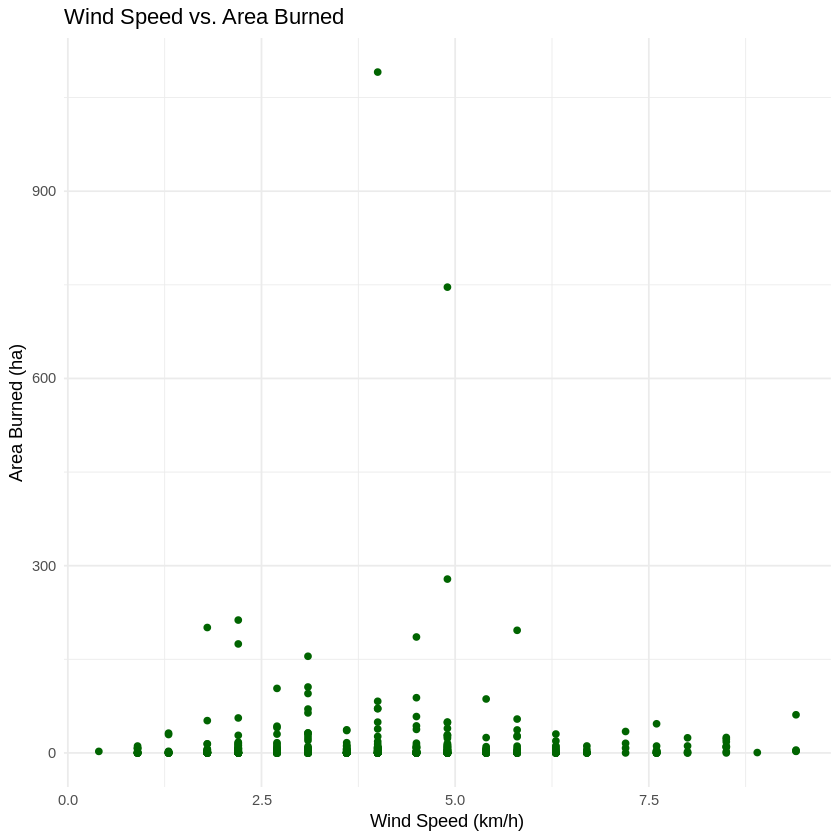

In [14]:
# Scatter plot of wind speed vs. area burned
ggplot(data, aes(x = wind, y = area)) +
  geom_point(color = "darkgreen") +
  labs(title = "Wind Speed vs. Area Burned", x = "Wind Speed (km/h)", y = "Area Burned (ha)") +
  theme_minimal()


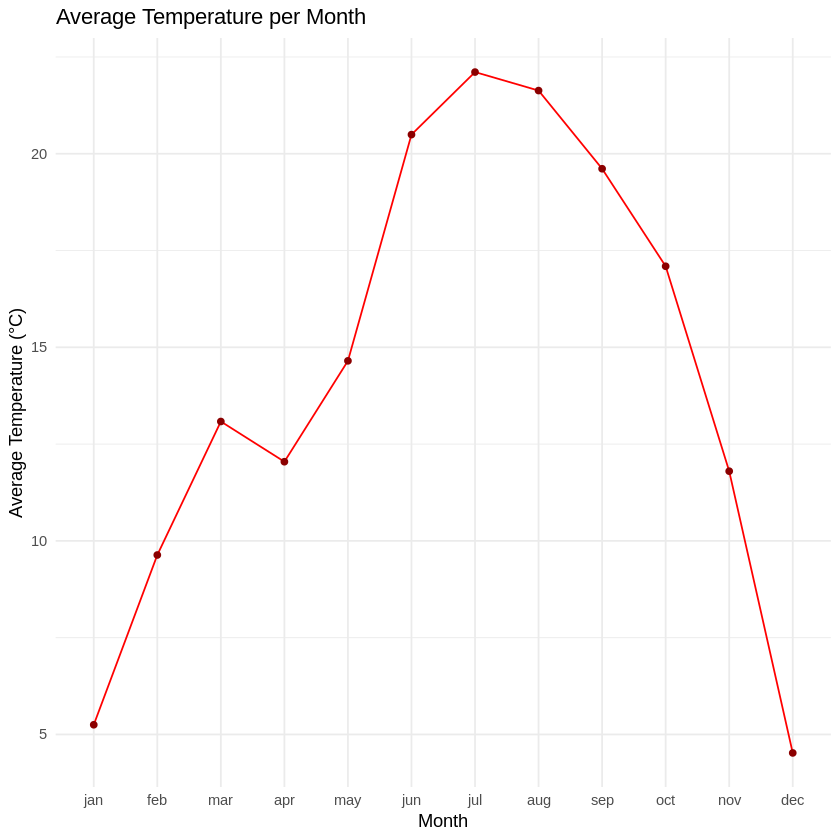

In [15]:
# Calculate the average temperature per month
avg_temp_per_month <- data %>%
  group_by(month) %>%
  summarize(avg_temp = mean(temp))

# Line plot of average temperature per month
ggplot(avg_temp_per_month, aes(x = month, y = avg_temp, group = 1)) +
  geom_line(color = "red") +
  geom_point(color = "darkred") +
  labs(title = "Average Temperature per Month", x = "Month", y = "Average Temperature (°C)") +
  theme_minimal()


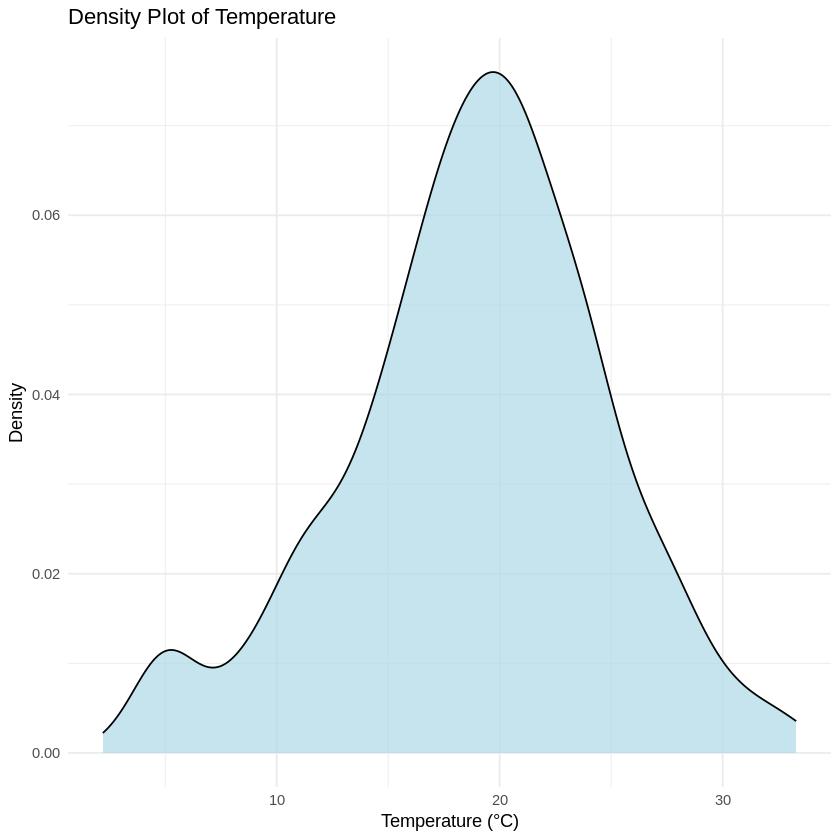

In [16]:
# Density plot of temperature distribution
ggplot(data, aes(x = temp)) +
  geom_density(fill = "lightblue", alpha = 0.7) +
  labs(title = "Density Plot of Temperature", x = "Temperature (°C)", y = "Density") +
  theme_minimal()


Loading required package: GGally

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GGally’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



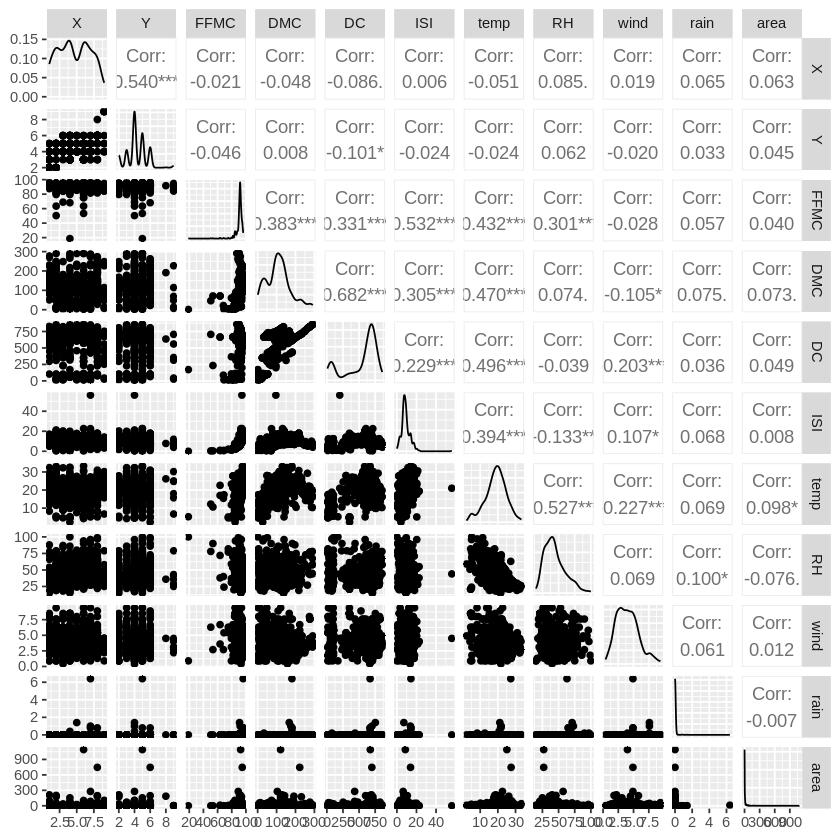

In [18]:
# Install and load GGally if not already installed
if (!require(GGally)) {
  install.packages("GGally")
}

library(GGally)

# Pair plot for numeric columns
numeric_data <- data %>% select_if(is.numeric)
ggpairs(numeric_data)
